<a href="https://colab.research.google.com/github/asgutierrt/Introduction-to-IA/blob/main/unsupervised/no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# dataset
from sklearn import datasets

# data handling
import numpy as np

# plotting
import matplotlib.pyplot as plt


# import some data to play with
iris = datasets.load_iris()
X = iris.data[:,:]; y = iris.target
X = (X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0)) # normalizar

# covarianza
cov=np.cov(X,rowvar=False); cov_i=np.linalg.pinv(cov)

In [5]:
def norma (X,Y,norma='euclidea',cov_i=''):
  if norma=='coseno':
    num=np.matmul(X,Y)
    den=np.linalg.norm(X,ord=2)*np.linalg.norm(Y,ord=2)
    return 1-num/den
  if norma=='mahalanobis':
    return np.sqrt((X-Y).dot(cov_i).dot((X-Y).T))
  if norma=='manhattan': p=1
  if norma=='euclidea': p=2
  if norma=='Lp': p=p
  return (abs(X-Y)**p).sum()**(1/p)

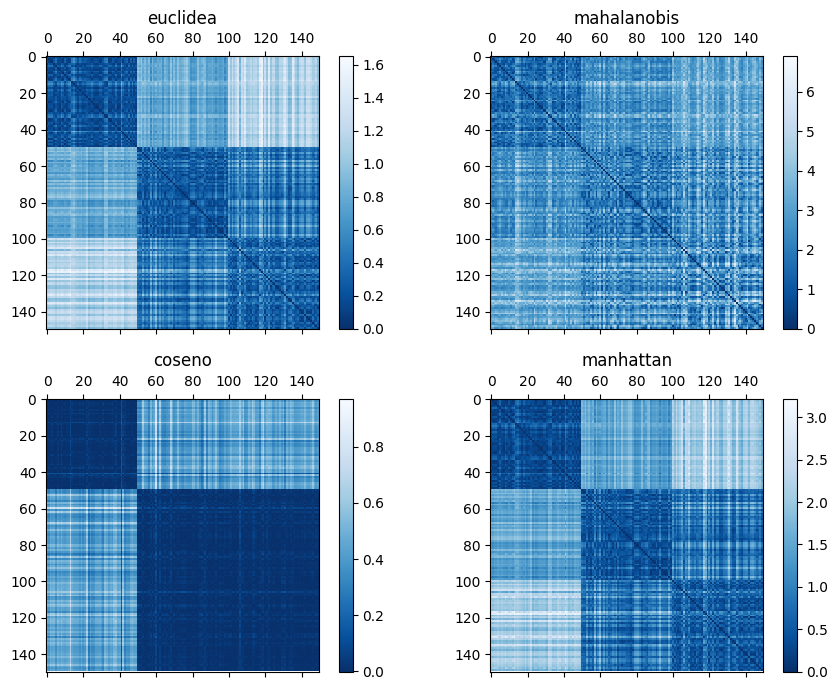

In [6]:
norms=['euclidea','mahalanobis','coseno','manhattan']

nrows=2; ncols=2
fig=plt.figure(figsize=(9,7))

for i in range(len(norms)):
  D=np.array([norma(x,y,norma=norms[i],cov_i=cov_i) for x in X for y in X]).reshape(len(X),-1)
  ax=plt.subplot(nrows,ncols,i+1)
  cax=ax.matshow(D, cmap=plt.cm.Blues.reversed())
  ax.set_title(norms[i])
  fig.colorbar(cax, ax=ax,fraction=0.046)
fig.tight_layout()

In [90]:
n_groups=3

def func(x):
  return x/((x.max()-x.min())/n_groups)

G=np.apply_along_axis(func, 0, D).astype(int)

In [91]:
G

array([[0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       [0, 0, 0, ..., 2, 2, 2],
       ...,
       [2, 1, 2, ..., 0, 0, 0],
       [1, 2, 2, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

# grid

In [ ]:
from itertools import product
import numpy as np

malla=lambda m, n_intervals: list(product(np.arange(n_intervals +1)*1/n_intervals,repeat=m))
n_grid_intervals= lambda N,m: int(np.exp(np.log(N)/m)-1)

m=len(X[0]); N=len(X)
grid=malla(m,n_grid_intervals(N,m))
len(grid)

<ipython-input-205-b72b0712d92a>:5: RuntimeWarning: invalid value encountered in double_scalars
  return 1-num/den


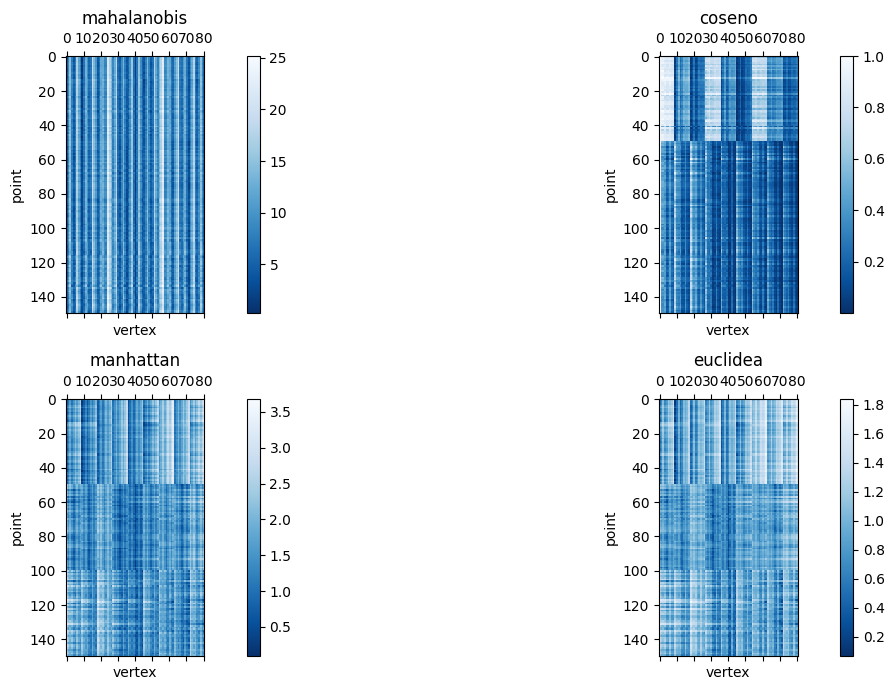

In [218]:
nrows=2; ncols=2
fig=plt.figure(figsize=(15,7))
norms=['mahalanobis','coseno','manhattan','euclidea']

for i in range(len(norms)):
  D=np.array([norma(x,y,norma=norms[i],cov_i=cov_i) for x in X for y in grid]).reshape(len(X),-1)
  ax=plt.subplot(nrows,ncols,i+1)
  cax=ax.matshow(D, cmap=plt.cm.Blues.reversed())
  ax.set_title(norms[i]); ax.set_xlabel('vertex'); ax.set_ylabel('point')
  fig.colorbar(cax, ax=ax,fraction=0.046)
plt.tight_layout()

In [157]:
#!pip install babyplots
from babyplots import Babyplot

bp = Babyplot(background_color="#ffffddff", turntable=True)
bp.add_plot(X, "pointCloud", "categories", y, {"colorScale": "Dark2"})
bp

creating temporary file
opening temporary file in webbrowser


<babyplots visualization with 1 plot(s)>